# Windkessel

In [1]:
import numpy as np
import torch

In [2]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

In [3]:
import sys
sys.path.insert(0, './python')

In [4]:
from windkessel import model

## Проверка

In [5]:
test_model = model.WindkesselModel()

In [6]:
test_model.R.data   = torch.ones(1, dtype=torch.float64)
test_model.Z_0.data = torch.ones(1, dtype=torch.float64)
test_model.C.data   = torch.ones(1, dtype=torch.float64)

In [7]:
T = np.linspace(0.0, 2.0 * np.pi, 101)
Q_in = np.sin(T)
test_model.set_Q_in(T, Q_in)

### Получение $ P(t) $ по $ Q_{in}(t) $

In [8]:
from scipy.integrate import solve_ivp

In [9]:
def P_rhs(t, P):
    return test_model.P_rhs(t, P).detach().numpy()

In [10]:
result = solve_ivp(P_rhs, (0.0, 2.0 * np.pi), np.array([10.0]), t_eval = T)

In [11]:
P = result.y[0]

In [12]:
def plot_x_y(x, y):
    fig = plt.figure()
    ax = fig.gca()
    fig.set_figheight(12)
    fig.set_figwidth(16)
    ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    
    ax.plot(x, y)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')

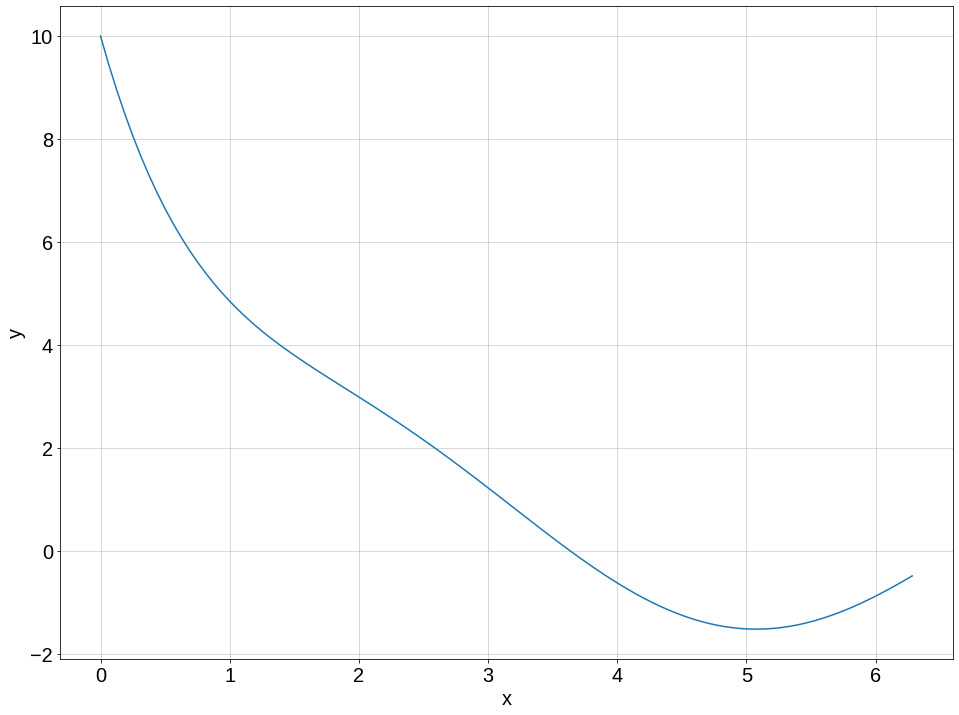

In [13]:
plot_x_y(T, P)

### Получение $ Q_{in}(t) $ по $ P(t) $

In [14]:
def Q_in_rhs(t, Q_in):
    return test_model.Q_in_rhs(t, Q_in).detach().numpy()

In [15]:
test_model.set_P(T, P)

In [16]:
result = solve_ivp(Q_in_rhs, (0.0, 2.0 * np.pi), np.array([0.0]), t_eval = T)

In [17]:
numerical_Q_in = result.y[0]

In [18]:
print("Error L2-norm: %.2e" % np.linalg.norm(Q_in - numerical_Q_in))
print("Error C-norm: %.2e"  % np.max(np.abs(Q_in - numerical_Q_in)))

Error L2-norm: 1.84e-02
Error C-norm: 9.70e-03
